In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
import re

In [68]:
fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')

In [69]:
fake_news['label'] = 0  # 0 for fake news
true_news['label'] = 1  # 1 for true news

In [70]:
news_data = pd.concat([fake_news, true_news], ignore_index=True)

In [71]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  
    return text

In [76]:
news_data['text'] = news_data['text'].apply(preprocess_text)

In [77]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, stop_words='english')
X = tfidf_vectorizer.fit_transform(news_data['text'])
y = news_data['label']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Model Accuracy: 0.9875278396436525
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [80]:
def predict_news(text):
    processed_text = preprocess_text(text)
    text_vectorized = tfidf_vectorizer.transform([processed_text])
    prediction = model.predict(text_vectorized)
    return "True News" if prediction[0] == 1 else "Fake News"


new_article = input("Enter a news article to check if it's fake or true: ")
result = predict_news(new_article)
print("Prediction:", result)

Enter a news article to check if it's fake or true:  NEW YORK (Reuters) - The U.S. Justice Department has issued new guidelines for immigration judges that remove some instructions for how to protect unaccompanied juveniles appearing in their courtrooms. A Dec. 20 memo, issued by the Executive Office for Immigration Review (EOIR) replaces 2007 guidelines, spelling out policies and procedures judges should follow in dealing with children who crossed the border illegally alone and face possible deportation.  The new memo removes suggestions contained in the 2007 memo for how to conduct â€œchild-sensitive questioningâ€ and adds reminders to judges to maintain â€œimpartialityâ€ even though â€œjuvenile cases may present sympathetic allegations.â€ The new document also changes the word â€œchildâ€ to â€œunmarried individual under the age of 18â€ in many instances. (Link to comparison: tmsnrt.rs/2BlT0VK May 2007 document: tmsnrt.rs/2BBR8wj December 2017 document: tmsnrt.rs/2C2sWCs)  An EO

Prediction: True News


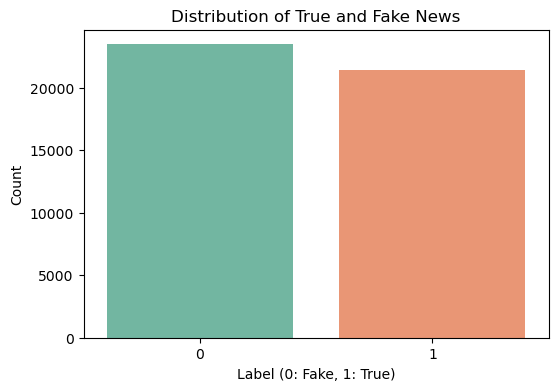

In [82]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=news_data, palette='Set2')
plt.title('Distribution of True and Fake News')
plt.xlabel('Label (0: Fake, 1: True)')
plt.ylabel('Count')
plt.show()

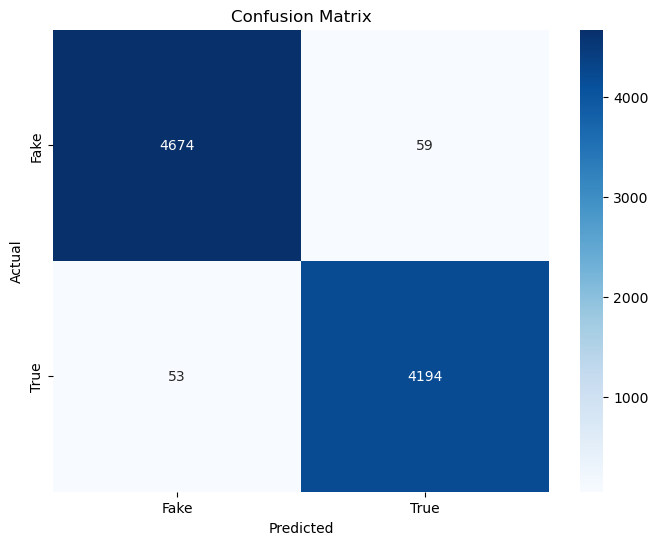

In [83]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred)